In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
excel_file = r"C:\Users\asmaj\Downloads\Data analyst Data.xlsx" 
data = pd.read_excel(excel_file)

# Display the first few rows of the dataset to understand its structure
data.head(4)


,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no


1. How many unique students are included in the dataset?

In [5]:
# Count unique students by 'Email ID'
unique_students = data['Email ID'].nunique()
print(f"Number of unique students: {unique_students}")


Number of unique students: 2157



2. What is the average GPA of the students?

In [6]:
# Calculate the average GPA
average_gpa = data['CGPA'].mean()
print(f"Average GPA: {average_gpa}")


Average GPA: 8.038475684511647


3. What is the distribution of students across different graduation years?

Graduation Year Distribution:
Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64


C:\Users\asmaj\AppData\Local\Temp\ipykernel_14688\1350773742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grad_year_distribution.index, y=grad_year_distribution.values, palette="viridis")
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

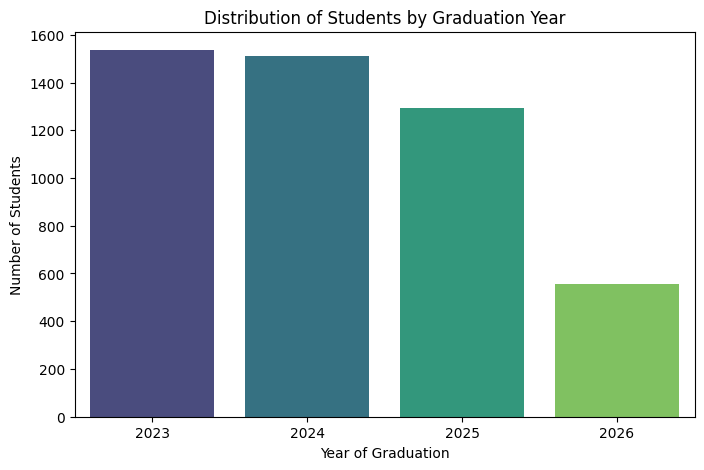

In [30]:
# Distribution of students across graduation years
grad_year_distribution = data['Year of Graduation'].value_counts()
print("Graduation Year Distribution:")
print(grad_year_distribution)


# Plot the graduation year distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=grad_year_distribution.index, y=grad_year_distribution.values, palette="viridis")
plt.title("Distribution of Students by Graduation Year")
plt.xlabel("Year of Graduation")
plt.ylabel("Number of Students")
plt.show()


4. What is the distribution of student's experience with Python programming?

Python Experience Distribution:
Experience with python (Months)
5    1242
3    1008
8     800
6     738
7     640
4     466
Name: count, dtype: int64


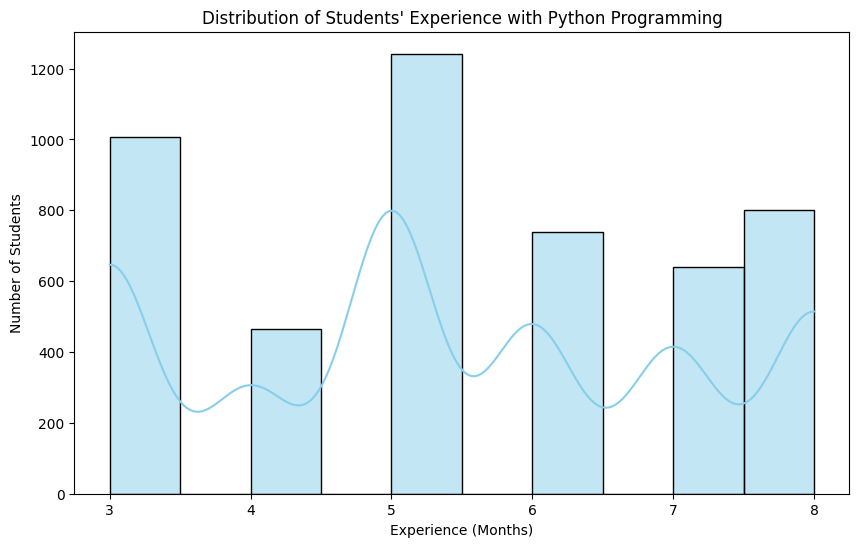

In [8]:
# Distribution of Python programming experience
python_experience_distribution = data['Experience with python (Months)'].value_counts()
print("Python Experience Distribution:")
print(python_experience_distribution)

# Plot the distribution of students' experience with Python
plt.figure(figsize=(10, 6))
sns.histplot(data['Experience with python (Months)'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Students\' Experience with Python Programming')
plt.xlabel('Experience (Months)')
plt.ylabel('Number of Students')
plt.show()


5. What is the average family income of the students?

In [41]:
# Function to parse family income strings into numeric values
def parse_income(income_str):
    if pd.isna(income_str):  # Handle NaN
        return np.nan
    if '-' in income_str:  # Handle ranges like '2-5 Lakh'
        low, high = income_str.replace(' Lakh', '').split('-')
        return (float(low.strip()) + float(high.strip())) / 2
    return float(income_str.replace(' Lakh', '').replace('+', '').strip())  # Handle single values

# Fill NaN and apply the function
data['Family Income'] = data['Family Income'].fillna('0 Lakh')
data['Family Income Numeric'] = data['Family Income'].apply(parse_income)

# Calculate and print the average
average_income = data['Family Income Numeric'].mean()
print(f"Average Family Income: {average_income:.2f} Lac")


Average Family Income: 1.29 Lac


6. How does the GPA vary among different colleges? (Show top 5 results only)

In [42]:
# GPA variation among colleges (Top 5)
gpa_by_college = data.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5)
print("Top 5 Colleges by GPA:")
print(gpa_by_college)


Top 5 Colleges by GPA:
College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


7. Are there any outliers in the quantity (number of courses completed) attribute?

In [43]:
# Statistical description for Quantity column
quantity_outliers = data['Quantity'].describe()
print("Quantity Statistics:")
print(quantity_outliers)




Quantity Statistics:
count    4894.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Quantity, dtype: float64


8. What is the average GPA for students from each city?

In [44]:
# Average GPA by city
average_gpa_by_city = data.groupby('City')['CGPA'].mean()
print("Average GPA by City:")
print(average_gpa_by_city)


Average GPA by City:
City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


9. Can we identify any relationship between family income and GPA?

In [24]:
# Analyze the relationship between family income and GPA
income_vs_gpa = data[['Family Income', 'CGPA']].dropna()
correlation = income_vs_gpa.corr()
print("Correlation between Family Income and GPA:")
print(correlation)


Correlation between Family Income and GPA:
               Family Income      CGPA
Family Income       1.000000  0.015311
CGPA                0.015311  1.000000


10. How many students from various cities? (Solve using data visualization tool).

Number of Students from Each City:
Chandigarh: 57
Siuri: 56
Talmuk: 56
Gonda: 56
Sikar: 52
Kota: 52
Bikaner: 52
Jaipur: 52
Jhalwar: 52
Jodhpur: 52
Ahemdabad: 52
Jalor: 52
Pali: 52
Amreli: 52
Dwarka: 52
Patiala: 51
Barmer: 51
Amer: 51
Ajmer: 51
Sangrur: 51
Jalgaon: 51
Amritsar: 51
Buldhana: 51
Aurangabad: 51
Mahe: 51
Bhandara: 51
Bhsawal: 51
Bid: 51
Dhule: 51
Kalyan: 51
Thane: 51
Navi Mumbai: 51
Mumbai: 51
Nagpur: 51
Nanded: 51
Godhra: 50
Navsari: 44
Valsad: 44
Surat: 44
Morbi: 44
Kheda: 44
Junagadh: 44
Rajkot: 44
Okha: 44
Nadiad: 44
Jamnagar: 44
Ambala: 43
Faridabad: 43
Hamirpur: 42
Ujjain: 42
Sagar: 42
Orchha: 42
Satna: 42
Akola: 42
Vidisha: 42
Mainpuri: 28
Mathura: 28
Deoria: 28
Gorakhpur: 28
Ghaziabad: 28
Durgapur: 28
Kanpur: 28
Malda: 28
Kolkata: 28
Jhansi: 28
Ghazipur: 28
Budaun: 28
Aligarh: 28
Agra: 28
Agartala: 28
Titagrah: 28
Silguri: 28
Siliguri: 28
Santipur: 28
Palashi: 28
Hugli: 28
Nizambad: 28
Alipore: 28
Almora: 28
Varanasi: 28
Haora: 28
Lucknow: 28
Gurugram: 27
Hisar: 27


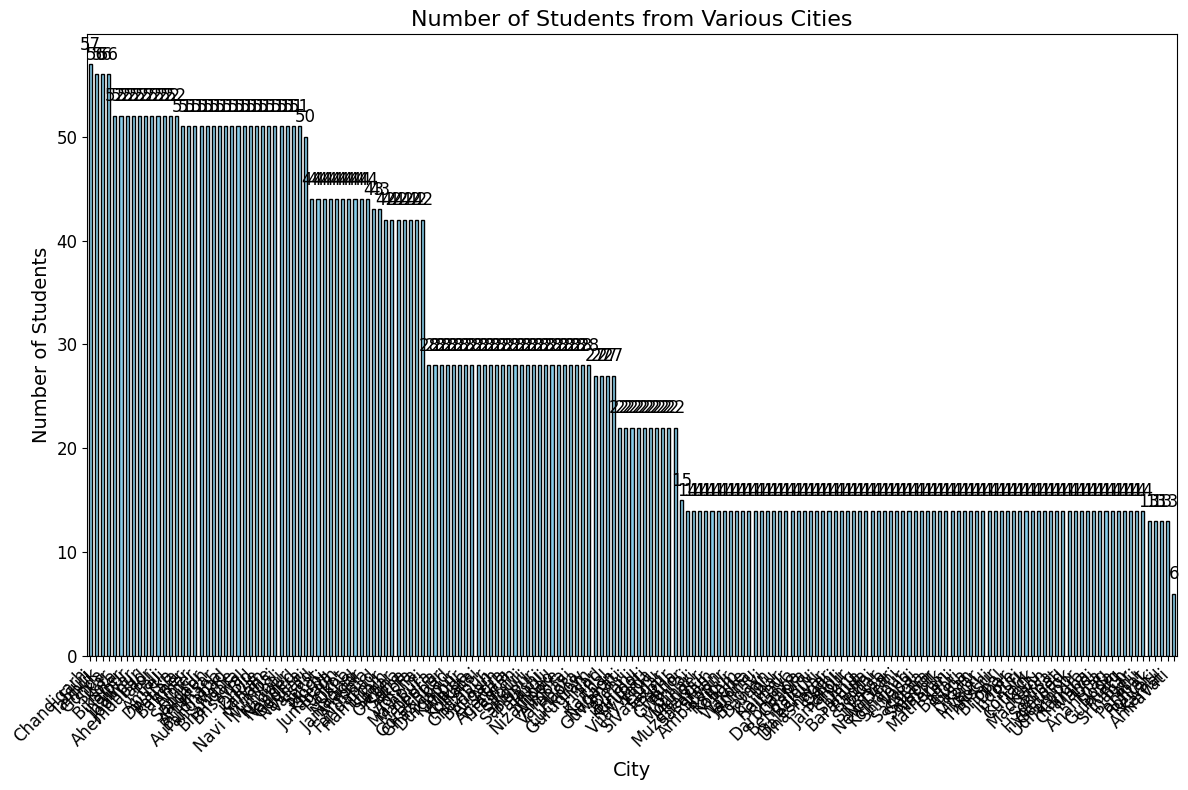

In [47]:
# Count the number of students from each city
students_per_city = data['City'].value_counts()

# Display the number of students for each city in text format
print("Number of Students from Each City:")
for city, count in students_per_city.items():
    print(f"{city}: {count}")

# Plot the number of students from various cities
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
ax = students_per_city.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels with larger font size
plt.title('Number of Students from Various Cities', fontsize=16)
plt.ylabel('Number of Students', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-ticks and align for readability
plt.yticks(fontsize=12)

# Add data labels on top of the bars
for index, value in enumerate(students_per_city):
    ax.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?

In [48]:
# Expected salary variation based on GPA, family income, and Python experience
expected_salary_analysis = data[['CGPA', 'Family Income (Numeric)', 'Experience with python (Months)', 'Expected salary (Lac)']].dropna()
print("Expected Salary Analysis:")
print(expected_salary_analysis.describe())


Expected Salary Analysis:
              CGPA  Family Income (Numeric)  Experience with python (Months)  \
count  4894.000000              4894.000000                      4894.000000   
mean      8.038476                 1.272579                         5.395586   
std       1.005184                 1.073660                         1.705364   
min       6.200000                 1.000000                         3.000000   
25%       7.200000                 1.000000                         4.000000   
50%       7.900000                 1.000000                         5.000000   
75%       8.900000                 1.000000                         7.000000   
max       9.900000                 7.000000                         8.000000   

       Expected salary (Lac)  
count            4894.000000  
mean               13.935635  
std                 6.451959  
min                 5.000000  
25%                 8.000000  
50%                13.000000  
75%                19.000000  
max  

12. Which event tends to attract more students from specific fields of study?

C:\Users\asmaj\AppData\Local\Temp\ipykernel_14688\471150680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_distribution.index, y=event_distribution.values, palette="muted")
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

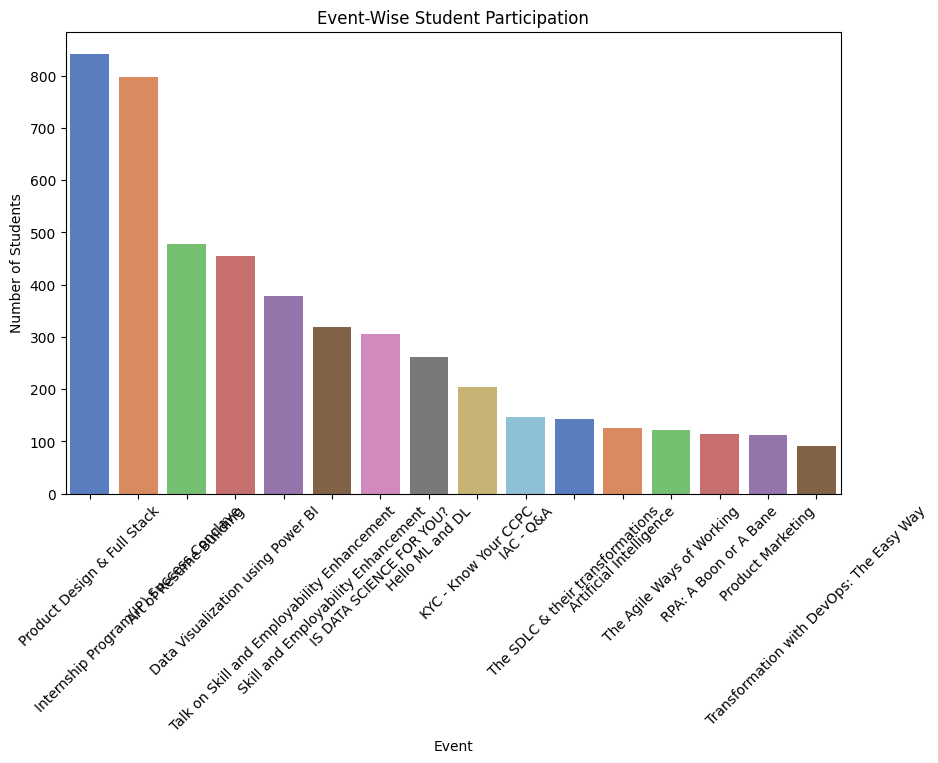

In [60]:
# Event-wise student distribution
event_distribution = data['Events'].value_counts()

# Plot event distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=event_distribution.index, y=event_distribution.values, palette="muted")
plt.title("Event-Wise Student Participation")
plt.xlabel("Event")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()


13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

Leadership Impact on GPA and Salary:
                        CGPA  Expected salary (Lac)
Leadership- skills                                 
no                  8.040444              13.795098
no                  8.034816              14.407975
yes                 8.036787              13.971796


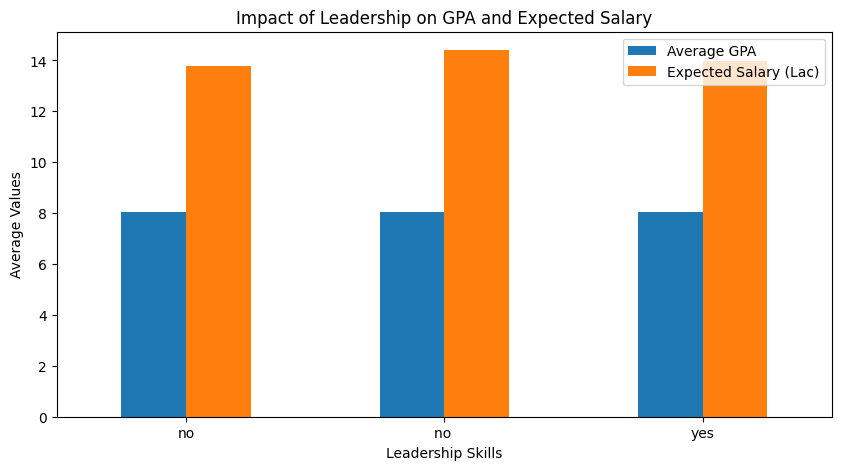

In [68]:
# Leadership impact on GPA and expected salary
leadership_analysis = data.groupby('Leadership- skills')[['CGPA', 'Expected salary (Lac)']].mean()
print("Leadership Impact on GPA and Salary:")
print(leadership_analysis)

# Plot Leadership impact on GPA and Salary
leadership_analysis.plot(kind='bar', figsize=(10, 5), color=['#1f77b4', '#ff7f0e'])
plt.title("Impact of Leadership on GPA and Expected Salary")
plt.xlabel("Leadership Skills")
plt.ylabel("Average Values")
plt.xticks(rotation=0)
plt.legend(["Average GPA", "Expected Salary (Lac)"])
plt.show()

14. How many students are graduating by the end of 2024?

In [ ]:
# Students graduating by the end of 2024
students_graduating_2024 = data[data['Year of Graduation'] <= 2024]['Email ID'].nunique()
print(f"Students graduating by 2024: {students_graduating_2024}")


Students graduating by 2024: 1664


15. Which promotion channel brings in more student participations for the event?

In [54]:
# Most effective promotion channels
promotion_channel_effectiveness = data['How did you come to know about this event?'].value_counts()
print("Promotion Channel Effectiveness:")
print(promotion_channel_effectiveness)


Promotion Channel Effectiveness:
How did you come to know about this event?
                                                                                               2216
Whatsapp                                                                                       1067
Email                                                                                           438
SPOC/ College Professor                                                                         326
Others                                                                                          153
                                                                                               ... 
Youtube | Instagram | Whatsapp | Email                                                            1
LinkedIn | Email | Telegram                                                                       1
Youtube | Email | Others                                                                          1
Youtube | Facebook | Ins

16. Find the total number of students who attended the events related to Data Science.

In [57]:
# Students attending Data Science events
data_science_students = data[data['Events'].str.contains('Data Science', na=False)]['Email ID'].nunique()
print(f"Total students attending Data Science events: {data_science_students}")


Total students attending Data Science events: 0


17. Those who have high CGPA & more experience in language those who had high expectations for salary? (Avg)


In [58]:
# High CGPA and Python experience leading to high expected salary
high_cgpa_experience = data[(data['CGPA'] > data['CGPA'].mean()) & 
                            (data['Experience with python (Months)'] > data['Experience with python (Months)'].mean())]
high_salary_expectation = high_cgpa_experience['Expected salary (Lac)'].mean()
print(f"Average salary for students with high CGPA and experience: {high_salary_expectation}")


Average salary for students with high CGPA and experience: 16.9203187250996


18. How many students know about the event from their colleges? Which of these Top 5 colleges?

Top 5 Colleges for Event Awareness:
College Name
vidyalankar institute of technology, mumbai              23
kle society's college of bca, rls institute, belagavi    23
mit academy of engineering ,alandi                       23
ld college of engineering, ahmedabad, gujarat            20
priyadarshini college of engineering, nagpur             20
Name: count, dtype: int64


C:\Users\asmaj\AppData\Local\Temp\ipykernel_14688\759492895.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="plasma")
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\asmaj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

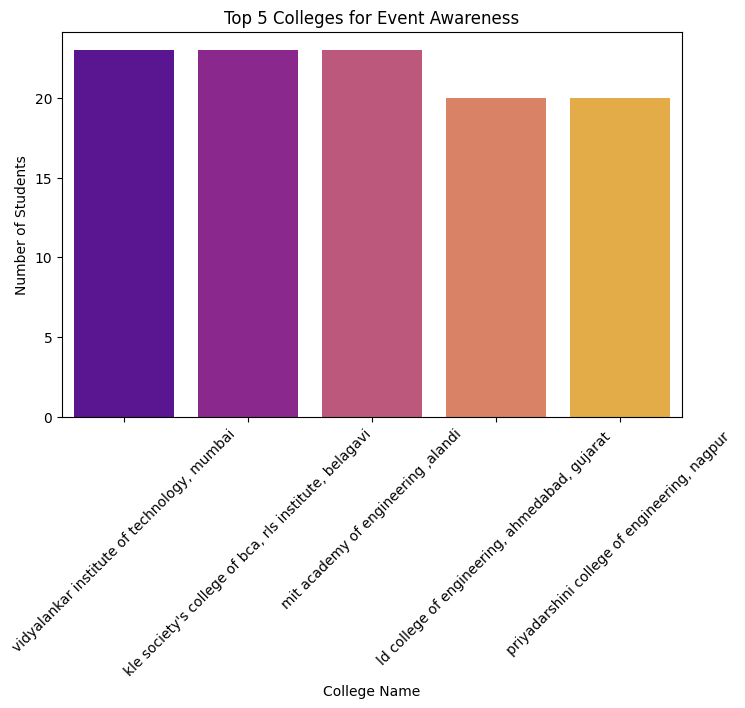

In [70]:
# Students knowing about events from college (Top 5 colleges)
college_participation = data[data['How did you come to know about this event?'].str.contains('College', na=False)]
top_colleges = college_participation['College Name'].value_counts().head(5)
print("Top 5 Colleges for Event Awareness:")
print(top_colleges)

# Plot Top 5 Colleges
plt.figure(figsize=(8, 5))
sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="plasma")
plt.title("Top 5 Colleges for Event Awareness")
plt.xlabel("College Name")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()